In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("Machine Learning Linear Regression Input (Insurance Data Prediction).csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<function matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)>

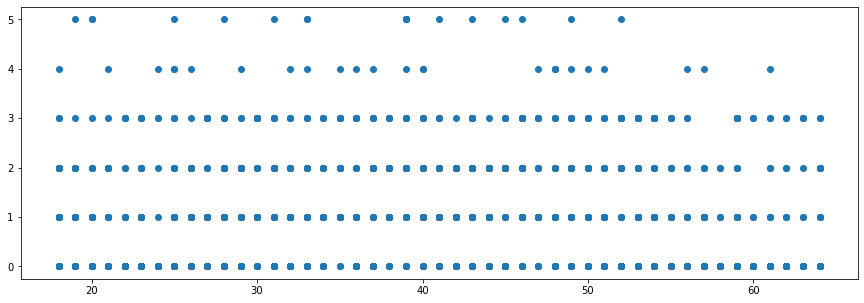

In [5]:
plt.subplots(figsize = (15,5))
plt.scatter(data["age"],data["children"])
plt.xticks

<BarContainer object of 1338 artists>

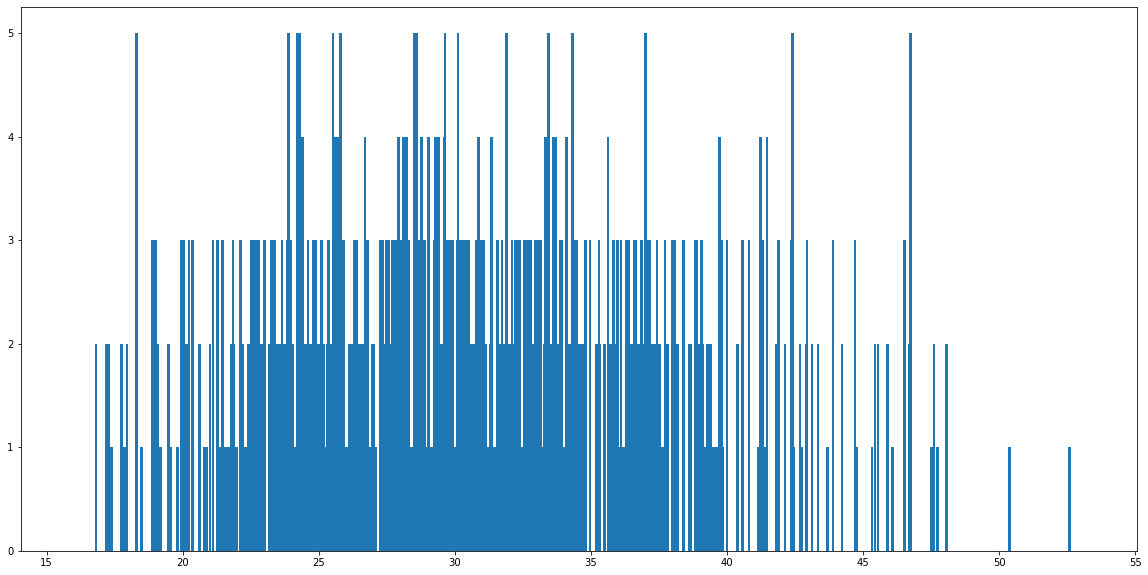

In [6]:
plt.subplots(figsize = (20,10))
plt.bar(data["bmi"], data["children"], width=0.1)

In [7]:
data["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [8]:
data["sex"] = data["sex"].map({"male":0, "female":1})

In [9]:
data["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [10]:
data["smoker"] = np.where(data["smoker"] == "yes",1, 0)

In [11]:
data.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int32
region       object
charges     float64
dtype: object

In [12]:
data = pd.get_dummies(data,drop_first = True)

In [13]:
data.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,1
1,18,0,33.770,1,0,1725.55230,0,1,0
2,28,0,33.000,3,0,4449.46200,0,1,0
3,33,0,22.705,0,0,21984.47061,1,0,0
4,32,0,28.880,0,0,3866.85520,1,0,0


In [14]:
# x = data.drop(["charges"])
x = data.drop("charges", axis= 1)
x.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,0,0,1
1,18,0,33.770,1,0,0,1,0
2,28,0,33.000,3,0,0,1,0
3,33,0,22.705,0,0,1,0,0
4,32,0,28.880,0,0,1,0,0


In [15]:
y = data[["charges"]]
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


array([[<AxesSubplot:title={'center':'charges'}>]], dtype=object)

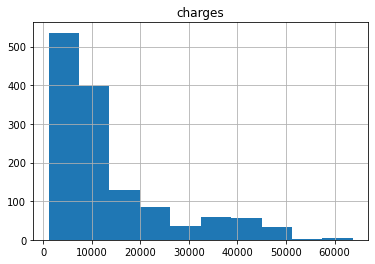

In [16]:
y.hist()

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)

In [19]:
scale = StandardScaler()

In [20]:
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)
y_train = scale.fit_transform(y_train)
y_test = scale.fit_transform(y_test)

In [21]:
model = LinearRegression()

In [22]:
model.fit(x_train,y_train)

LinearRegression()

In [23]:
model.score(x_train,y_train)

0.7370262574551634

In [24]:
model.score(x_test,y_test)

0.8017905093946005

In [25]:
y_pred = model.predict(x_test)

In [26]:
r2_score(y_test, y_pred)

0.8017905093946005

In [27]:
mean_absolute_error(y_test,y_pred)

0.31272013190522924

In [28]:
mean_squared_error(y_test,y_pred)

0.19820949060539958

In [29]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.4452072445562848